 *i.*
we initialize our data

In [7]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
scipy.random.seed(21345678) # for reproducibility (rng default)
mean1 = -2
variance1 = 1
mean2 = 1
variance2 = 1.5
n = 300
c1_samples = variance1*np.random.randn(n) + mean1
c2_samples = variance2*np.random.randn(n) + mean2

*ii*  
Because the distribution of the classes is known and what we are looking for is the distrubution parameters, we will use MLE para
We will now use the parameter MLE we found in class to estimate the mean and the variance of c1,c2
$$\hat\mu=\frac{1}{n}\sum_{i=1}^{n}{x_k}$$  $$\hat\sigma=\frac{1}{n}\sum_{i=1}^{n}(x_k-\hat\mu)^2$$


In [8]:

est_mean1 = 1/n*sum(c1_samples)
est_variance1 = 1/(n)*sum((c1_samples - est_mean1)**2)
est_mean2 = 1/n*sum(c2_samples)
est_variance2 = 1/(n)*sum((c2_samples - est_mean2)**2)
print("C_1 ~ N({},{})".format(est_mean1,est_variance1))
print("C_2 ~ N({},{})".format(est_mean2,est_variance2))

C_1 ~ N(-2.0380842086290056,1.1215799416185939)
C_2 ~ N(1.0032725968608502,2.1233820612189507)


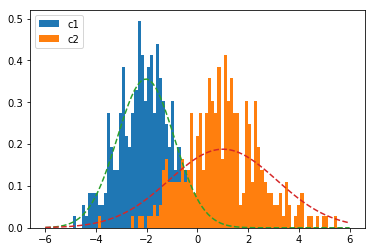

In [9]:
bins = np.linspace(-6,6,100)
fig, ax = plt.subplots()
ax.hist(c1_samples, bins, normed=1,label='c1')
ax.hist(c2_samples, bins, normed=1,label='c2')
c1_est = mlab.normpdf(bins,est_mean1,est_variance1)
c2_est = mlab.normpdf(bins,est_mean2,est_variance2)
ax.plot(bins,c1_est,'--')
ax.plot(bins,c2_est,'--')
plt.legend(loc='upper left')
plt.show()

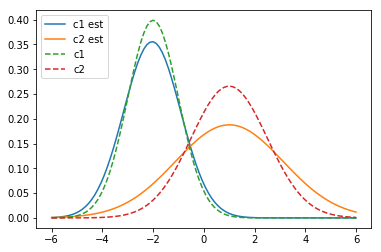

In [10]:
fig, ax = plt.subplots()
c1 = mlab.normpdf(bins,mean1,variance1)
c2 = mlab.normpdf(bins,mean2,variance2)
ax.plot(bins,c1_est,'-',label='c1 est')
ax.plot(bins,c2_est,'-',label='c2 est')
ax.plot(bins,c1,'--',label='c1')
ax.plot(bins,c2,'--',label='c2')
plt.legend(loc='upper left')
plt.show()

The difference between the estimation and the actual distribution can be explained by the variance of the MLE of the mean
$E[(\hat\mu-\mu)^2]=\frac{\sigma^2}{n}$
which for c1 is much smaller than it is for c2 ($\sigma_1<\sigma_2$) 
As discussed in class, the variance is biased depending on the amount of samples we take and we only used 300 samples and so our estimate of the variance is biased.

intersection at ([-0.54545455],[ 0.14672017])


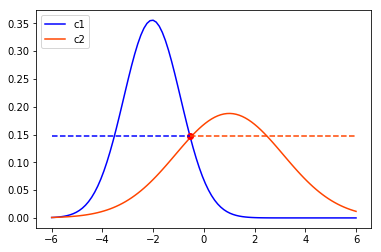

In [11]:
idx = np.argwhere(np.diff(np.sign(c1_est - c2_est)) != 0).reshape(-1) + 0
idx = idx[1:]
print("intersection at ({},{})".format(bins[idx],c1_est[idx]))
fig, ax = plt.subplots()
ax.plot(bins,c1_est,'-',label='c1',color="blue")
ax.plot(bins,c2_est,'-',label='c2',color="orangered")
ax.plot(bins[idx],c1_est[idx],'ro')
ax.plot([bins[0],bins[idx]],[c1_est[idx],c1_est[idx]],'--',color="blue")
ax.plot([bins[idx],bins[-1]],[c1_est[idx],c1_est[idx]],'--',color="orangered")
plt.legend(loc='upper left')
plt.show()

And so we will decide
$$x\in C_1 if x\in (-\infty,-0.54)$$
$$x\in C_2 if x\in [-0.54,\infty)$$


*iii*  
We now define cost functions $\lambda(C_2|C_1) = 1,\lambda(C_1|C_2) = 4$  
We will try to minimize the risk functions  
$R(C_1|x)=\lambda(C_1|C_2)P(C_2|x)=P(C_2|x)$  
$R(C_2|x)=\lambda(C_2|C_1)P(C_1|x)=4P(C_1|x)$  
because the priors are equal, we need to solve  
$$\frac{P(x|C_1)}{P(x|C_2)} > \frac{\lambda_{12}}{\lambda_{21}}$$  
  
$$-\frac{(x+2)^2}{1} + \frac{(x-1)^2}{1.5} < \ln{(\frac{1}{4})}$$  
  
$$x<-0.34$$
And so we will decide
our decision boundry moved to $-0.34$


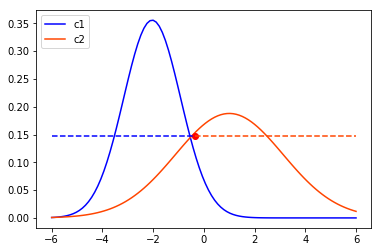

In [12]:
fig, ax = plt.subplots()
ax.plot(bins,c1_est,'-',label='c1',color="blue")
ax.plot(bins,c2_est,'-',label='c2',color="orangered")
ax.plot(-0.34,c1_est[idx],'ro')
ax.plot([bins[0],-0.34],[c1_est[idx],c1_est[idx]],'--',color="blue")
ax.plot([-0.34,bins[-1]],[c1_est[idx],c1_est[idx]],'--',color="orangered")
plt.legend(loc='upper left')
plt.show()